In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from common import Fonts, Images, NWSL, Colors, add_twitter_handle, add_source

In [2]:
year = "2024"

In [3]:
# Read data
df = pd.read_csv("data/" + year + "_subs_agg_filtered.csv")
df

,team,avg_subs,sub_0_min,sub_1_min,sub_2_min,sub_3_min,sub_4_min,sub_0_count,sub_1_count,sub_2_count,sub_3_count,sub_4_count
0,CHI,4.000000,60.500000,67.000000,72.789474,75.571429,83.000000,20,20,19,14,7
1,HOU,3.842105,58.315789,66.941176,76.294118,80.583333,90.428571,19,17,17,12,7
2,KCC,3.850000,56.350000,69.450000,81.263158,84.333333,89.166667,20,20,19,12,6
3,LA,4.380952,59.190476,64.523810,70.761905,79.000000,82.545455,21,21,21,18,11
4,LOU,4.100000,60.500000,68.600000,74.052632,84.117647,84.166667,20,20,19,17,6
5,NC,3.600000,63.842105,69.736842,78.250000,83.000000,84.714286,19,19,16,11,7
6,NJY,4.222222,59.000000,68.055556,75.705882,79.500000,84.222222,18,18,17,14,9
7,ORL,4.000000,58.350000,69.050000,78.789474,83.285714,84.000000,20,20,19,14,7
8,POR,4.428571,57.190476,65.285714,70.550000,76.117647,80.214286,21,21,20,17,14
9,RGN,4.111111,62.555556,71.611111,77.500000,85.285714,86.285714,18,18,16,14,7


In [4]:
# Sort data
df = df.sort_values("sub_0_min", ascending=False).reset_index(drop=True)
df

,team,avg_subs,sub_0_min,sub_1_min,sub_2_min,sub_3_min,sub_4_min,sub_0_count,sub_1_count,sub_2_count,sub_3_count,sub_4_count
0,NC,3.600000,63.842105,69.736842,78.250000,83.000000,84.714286,19,19,16,11,7
1,WAS,3.523810,62.857143,72.666667,80.062500,89.272727,87.400000,21,21,16,11,5
2,RGN,4.111111,62.555556,71.611111,77.500000,85.285714,86.285714,18,18,16,14,7
3,CHI,4.000000,60.500000,67.000000,72.789474,75.571429,83.000000,20,20,19,14,7
4,LOU,4.100000,60.500000,68.600000,74.052632,84.117647,84.166667,20,20,19,17,6
5,LA,4.380952,59.190476,64.523810,70.761905,79.000000,82.545455,21,21,21,18,11
6,NJY,4.222222,59.000000,68.055556,75.705882,79.500000,84.222222,18,18,17,14,9
7,ORL,4.000000,58.350000,69.050000,78.789474,83.285714,84.000000,20,20,19,14,7
8,HOU,3.842105,58.315789,66.941176,76.294118,80.583333,90.428571,19,17,17,12,7
9,POR,4.428571,57.190476,65.285714,70.550000,76.117647,80.214286,21,21,20,17,14


<Figure size 5600x4000 with 0 Axes>

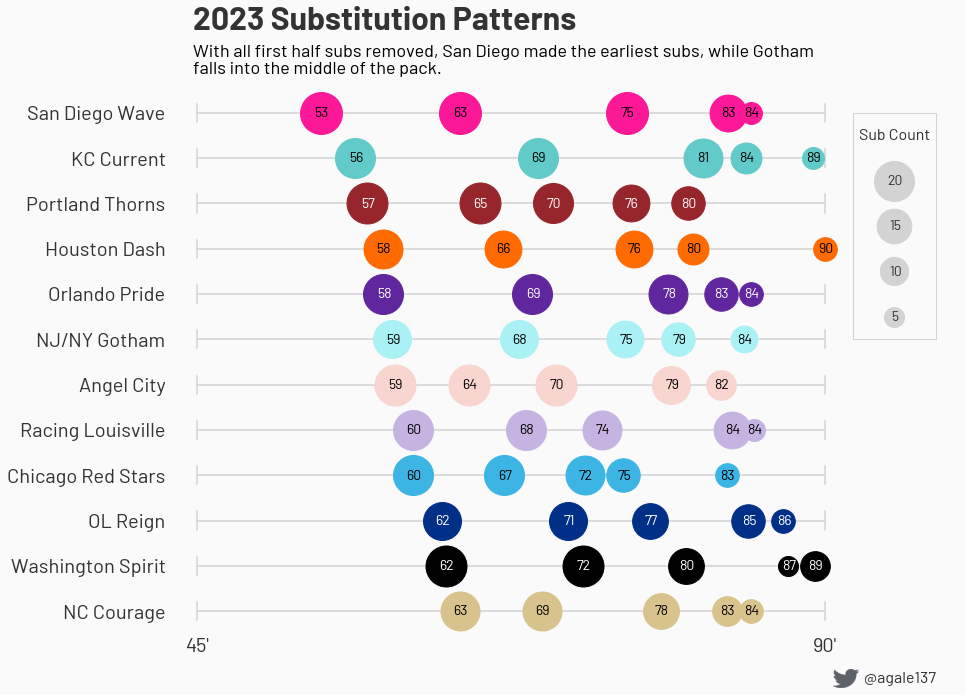

In [12]:
# Setup
plt.rcParams["figure.figsize"] = (14, 10)
plt.figure(dpi=400)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

# Plot data
for y, row in df.iterrows():
    # Background timeline
    ax.plot([45, 90], [y, y], color=Colors.LIGHT_GRAY, zorder=1)
    ax.plot([45, 45], [y - 0.2, y + 0.2], color=Colors.LIGHT_GRAY, zorder=1)
    ax.plot([90, 90], [y - 0.2, y + 0.2], color=Colors.LIGHT_GRAY, zorder=1)

    for x, i in [(row["sub_" + str(i) + "_min"], i) for i in range(0, 5)]:
        label = str(int(x))
        if x > 90:
            x = 90
        if row["team"] in ["SD", "ORL", "LOU", "RGN"]:
            if i == 3:
                x = x - 0.75
            elif i ==4:
                x = x + 0.75
        ax.scatter(
            [x],
            [y],
            color=NWSL.color(row["team"]),
            s=row["sub_" + str(i) + "_count"] * 80,
            zorder=2,
        )
        ax.text(
            x + 0.05,
            y - 0.01,
            label,
            ha="center",
            va="center",
            color=NWSL.text_color(row["team"]),
            fontproperties=Fonts.BARLOW,
            fontsize=14 if row["sub_" + str(i) + "_count"] > 4 else 12,
        )

# Legend

s = [5, 10, 15, 20]
x = 95
y = 6.5
ax.add_patch(
    Rectangle((x - 3, y-0.5), 6, 5, edgecolor=Colors.LIGHT_GRAY, fill=False, lw=1)
)
for i in range(0, len(s)):
    ax.scatter(
        [x],
        [y + i],
        color=Colors.LIGHT_GRAY,
        s=s[i] * 80,
        zorder=2,
    )
    ax.text(
        x + 0.05,
        y + i - 0.01,
        str(s[i]),
        ha="center",
        va="center",
        color=Colors.BLACK,
        fontproperties=Fonts.BARLOW,
        fontsize=14,
    )

ax.text(
    x,
    y + len(s),
    "Sub Count",
    ha="center",
    va="center",
    color=Colors.BLACK,
    fontproperties=Fonts.BARLOW,
    fontsize=16,
)

# Axes
ax.set_xlim([43, 99])
ax.set_xticks([45, 90])
ax.set_xticklabels(
    ["45'", "90'"], fontproperties=Fonts.BARLOW, size=20, color=Colors.BLACK
)

ax.set_ylim([-0.5, 11.5])
ax.set_yticks(range(0, 12))
ax.set_yticklabels(
    df["team"].apply(lambda x: NWSL.name(x)),
    fontproperties=Fonts.BARLOW,
    size=20,
    color=Colors.BLACK,
)
ax.tick_params(axis="both", which="major", length=0)
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)

# Title
plt.title(
    year + " Substitution Patterns",
    fontproperties=Fonts.BARLOW_BOLD,
    size=32,
    x=0.03,
    y=1.1,
    ha="left",
    color=Colors.BLACK,
)

# Subtitle
ax.text(
    0.03,
    1.03,
    "With all first half subs removed, San Diego made the earliest subs, while Gotham\nfalls into the middle of the pack.",
    fontproperties=Fonts.BARLOW,
    size=18,
    ha="left",
    transform=ax.transAxes,
)

add_twitter_handle(fig, x=0.78, y=0.05, fs=16, w=0.028)

# Save image
plt.savefig(
    "images/" + year + "_substitutes_filtered.png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400
)